In [2]:
import numpy as np
import pandas as pd

# from pyspark.sql import SparkSession
# from pyspark.sql import functions as f
# from pyspark.sql.types import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout, Bidirectional,GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras import models

import ast

import matplotlib.pyplot as plt


2024-07-02 22:30:31.928219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 22:30:32.308537: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 22:30:33.673192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-07-02 22:30:33.673375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [3]:
# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) 

# 1. Model

## CNN

In [4]:
def init_cnn():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_X.shape[1], 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

## LSTM

In [5]:
def init_lstm():
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    
    regressor.add(Dense(units=1))
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    regressor.compile(optimizer=optimizer, loss='mean_squared_error')
    return regressor

## BiLSTM

In [6]:

# def init_bilstm():
#     model = Sequential()
#     model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(train_X.shape[1], 1)))
#     model.add(Bidirectional(LSTM(32, return_sequences=True)))
#     model.add(Bidirectional(LSTM(32)))
#     model.add(Dropout(0.2))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1))
#     optimizer = keras.optimizers.Adam(lr=0.0001)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
#     return model

In [7]:

def init_bilstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(train_X.shape[1], 1)))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dropout(0.2))
    # model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

## GRU

In [8]:
# def init_gru():
#     model = Sequential()
#     model.add(Bidirectional(GRU(32), input_shape=(train_X.shape[1], 1)))
#     model.add(GRU(50))
#     model.add(Dropout(0.2))
#     model.add(Dense(6, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

In [9]:
def init_gru():
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=(train_X.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(GRU(64))
    model.add(Dropout(0.2))

    # model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

## MLP

In [10]:
def init_mlp():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(train_X.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1)) 
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

## BiGRULSTMCNN

In [11]:
# 2
from tensorflow.keras.layers import Input, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras import models

def create_lstm_model():
    input_shape = (train_X.shape[1], 1)
    input = Input(shape=input_shape)
    input = SpatialDropout1D(0.2)(input)

    x = Bidirectional(GRU(64, return_sequences = True))(input)
    x = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
        
    y = Bidirectional(LSTM(64, return_sequences = True))(input)
    y = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)
        
    avg_pool1 = GlobalAveragePooling1D()(x)
    max_pool1 = GlobalMaxPooling1D()(x)
        
    avg_pool2 = GlobalAveragePooling1D()(y)
    max_pool2 = GlobalMaxPooling1D()(y)

    conc = Concatenate(axis=-1)([avg_pool1, max_pool1, avg_pool2, max_pool2])

    hid_layer = Dense(128, activation='relu')(conc)
    dropout = Dropout(0.3)(hid_layer)
    # dropout = Dropout(0.3)(conc)

    output_layer = Dense(1)(dropout)
    
    model = models.Model(inputs=input, outputs=output_layer)
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

In [12]:
# def create_lstm_model1():
#     input_shape = (train_X.shape[1], 1)
#     input = Input(shape=input_shape)
#     # x1 = SpatialDropout1D(0.2)(input)

#     x = Bidirectional(GRU(50, return_sequences = True))(input)
#     x = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
    
        
#     y = Bidirectional(LSTM(50, return_sequences = True))(input)
#     y = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)
        
#     # avg_pool1 = GlobalAveragePooling1D()(x)
#     # max_pool1 = GlobalMaxPooling1D()(x)
        
#     # avg_pool2 = GlobalAveragePooling1D()(y)
#     # max_pool2 = GlobalMaxPooling1D()(y)

#     conc = Concatenate(axis=-1)([x, y])
#     conc = MaxPooling1D(pool_size=2)(conc)
#     conc = Flatten()(conc) 

#     # hid_layer = Dense(128, activation='relu')(conc)
#     # dropout = Dropout(0.3)(hid_layer)
#     dropout = Dropout(0.2)(conc)
#     output_layer = Dense(1)(dropout)
    
#     model = models.Model(inputs=input, outputs=output_layer)
    
#     optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
    
#     return model

In [13]:
# def create_lstm_model2():
#     input_shape = (train_X.shape[1], 1)
#     input = Input(shape=input_shape)
#     # x1 = SpatialDropout1D(0.2)(input)

#     x = Bidirectional(GRU(50, return_sequences = True))(input)
#     x = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
    
        
#     y = Bidirectional(LSTM(50, return_sequences = True))(input)
#     y = Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(y)
        
#     avg_pool1 = GlobalAveragePooling1D()(x)
#     max_pool1 = GlobalMaxPooling1D()(x)
        
#     avg_pool2 = GlobalAveragePooling1D()(y)
#     max_pool2 = GlobalMaxPooling1D()(y)

#     conc = Concatenate(axis=-1)([avg_pool1, max_pool1, avg_pool2, max_pool2])
    
#     # conc = Concatenate(axis=-1)([x, y])

#     # conc = MaxPooling1D(pool_size=4)(conc)
#     conc = Flatten()(conc)

#     # hid_layer = Dense(128, activation='relu')(conc)
#     # dropout = Dropout(0.3)(hid_layer)
#     dropout = Dropout(0.2)(conc)
#     output_layer = Dense(1)(dropout)
    
#     model = models.Model(inputs=input, outputs=output_layer)
    
#     optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
    
#     return model

In [14]:
# def init_bigtulstmcnn():
#     model = Sequential()
#     model.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(train_X.shape[1], 1)))
#     model.add(Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform"))
#     model.add(Dropout(0.2))

#     model.add(Bidirectional(LSTM(50, return_sequences=True)))
#     model.add(Conv1D(3, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform"))
#     model.add(Dropout(0.2))

#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Flatten())

#     model.add(Dense(100, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     optimizer = keras.optimizers.Adam(learning_rate=0.0001)
#     model.compile(optimizer=optimizer, loss='mse')

#     return model
    

# 2. Evaluator

In [15]:
def evaluator(test_y, predictions):
    # Đánh giá bằng MSE
    mse = mean_squared_error(test_y, predictions)

    # Đánh giá bằng RMSE
    rmse = np.sqrt(mse)

    # Đánh giá bằng MAE
    mae = mean_absolute_error(test_y, predictions)

    # Đánh giá bằng R2
    r2 = r2_score(test_y, predictions)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R-squared:", r2)

In [16]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [17]:
def plot_predict(test_y, predictions, title):
    plt.plot(test_y, color = 'red', label = 'Real')
    plt.plot(predictions, color = 'blue', label = 'Predicted')
    plt.title(title)
    plt.ylabel('Time delay')
    plt.xlabel('X')
    plt.legend()
    # plt.savefig('svm_result.jpg')
    plt.show()
    return plt

# 3. Bus

## 3.1 oad data

In [18]:
bus = pd.read_csv("../data/features_data/bus_feature_pd.csv")
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49051 entries, 0 to 49050
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               49051 non-null  object
 1   route              49051 non-null  int64 
 2   time               49051 non-null  object
 3   day                49051 non-null  object
 4   location           49051 non-null  object
 5   incident           49051 non-null  object
 6   min_delay          49051 non-null  int64 
 7   min_gap            49051 non-null  int64 
 8   direction          49051 non-null  object
 9   vehicle            49051 non-null  int64 
 10  day_month          49051 non-null  int64 
 11  month              49051 non-null  int64 
 12  hour               49051 non-null  int64 
 13  min                49051 non-null  int64 
 14  day_indexed        49051 non-null  int64 
 15  incident_indexed   49051 non-null  int64 
 16  direction_indexed  49051 non-null  int64

In [19]:
# X = np.array(bus['scaled'].tolist())

In [20]:
X =np.array(bus['scaled'].apply(ast.literal_eval).tolist())

In [21]:
y = bus["min_delay"]

In [22]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.3, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)


## 3.2 Train

### cnn

In [22]:
model_cnn = init_cnn()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_cnn.fit(train_X, train_y, epochs=200, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

2024-06-30 18:49:44.765803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 18:49:44.924786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 18:49:44.924902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 18:49:44.928382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

Epoch 1/200


2024-06-30 18:49:51.703164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2024-06-30 18:49:57.686985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1073/1073 [==============================] - 23s 10ms/step - loss: 100.9584 - val_loss: 52.6087
Epoch 2/200
1073/1073 [==============================] - 10s 9ms/step - loss: 31.3170 - val_loss: 19.6425
Epoch 3/200
1073/1073 [==============================] - 10s 9ms/step - loss: 22.1983 - val_loss: 18.2003
Epoch 4/200
1073/1073 [==============================] - 10s 9ms/step - loss: 20.7214 - val_loss: 17.2887
Epoch 5/200
1073/1073 [==============================] - 10s 10ms/step - loss: 19.9280 - val_loss: 16.7166
Epoch 6/200
1073/1073 [==============================] - 10s 10ms/step - loss: 19.4788 - val_loss: 16.8282
Epoch 7/200
1073/1073 [==============================] - 11s 10ms/step - loss: 19.1628 - val_loss: 16.0667
Epoch 8/200
1073/1073 [==============================] - 10s 9ms/step - loss: 19.0192 - val_loss: 15.9862
Epoch 9/200
1073/1073 [==============================] - 10s 10ms/step - loss: 18.7771 - val_loss: 15.9133
Epoch 10/200
1073/1073 [============================

In [29]:
history = model_cnn.fit(train_X, train_y, epochs=200, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/200
1073/1073 [==============================] - 8s 7ms/step - loss: 13.6905 - val_loss: 11.4133
Epoch 2/200
1073/1073 [==============================] - 8s 7ms/step - loss: 13.6577 - val_loss: 11.4602
Epoch 3/200
1073/1073 [==============================] - 8s 7ms/step - loss: 13.7576 - val_loss: 11.3305
Epoch 4/200
1073/1073 [==============================] - 7s 7ms/step - loss: 13.7168 - val_loss: 11.3530
Epoch 5/200
1073/1073 [==============================] - 7s 6ms/step - loss: 13.7814 - val_loss: 11.3639
Epoch 6/200
1073/1073 [==============================] - 7s 7ms/step - loss: 13.8452 - val_loss: 11.3344
Epoch 7/200
1073/1073 [==============================] - 6s 6ms/step - loss: 13.7997 - val_loss: 11.4682
Epoch 8/200
1073/1073 [==============================] - 8s 7ms/step - loss: 13.7981 - val_loss: 11.3263
Epoch 9/200
1073/1073 [==============================] - 8s 7ms/step - loss: 13.8547 - val_loss: 11.3571
Epoch 10/200
1073/1073 [==============================]

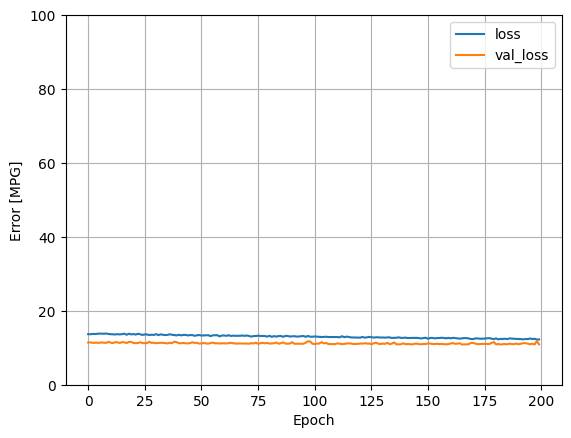

In [30]:
plot_loss(history)

In [31]:
predictions = model_cnn.predict(test_X)
evaluator(test_y,predictions) 

230/230 [==============================] - 1s 3ms/step
MSE: 11.675856185457782
RMSE: 3.4169951983369513
MAE: 1.3851581193014604
R-squared: 0.8576313257217407


In [ ]:
# 32 400
# MSE: 11.675856185457782
# RMSE: 3.4169951983369513
# MAE: 1.3851581193014604
# R-squared: 0.8576313257217407

In [32]:
# 32 200
# MSE: 11.90681528070878
# RMSE: 3.450625346326196
# MAE: 1.4980288402773045
# R-squared: 0.8548151850700378

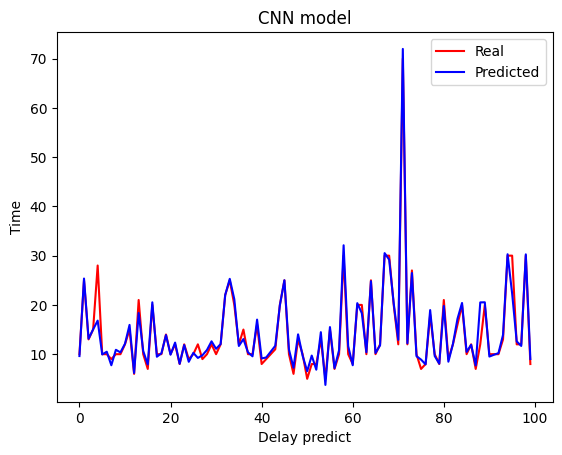

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [33]:
plot_predict(test_y.tolist()[:100], predictions[:100], "CNN model")

In [34]:
model_cnn.save("../model/bus_cnn_400.h5")

### lstm

In [36]:
model_lstm = init_lstm()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_lstm.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/300
1073/1073 [==============================] - 31s 22ms/step - loss: 117.7990 - val_loss: 85.1751
Epoch 2/300
1073/1073 [==============================] - 23s 21ms/step - loss: 86.8800 - val_loss: 83.0495
Epoch 3/300
1073/1073 [==============================] - 23s 21ms/step - loss: 86.0162 - val_loss: 83.0095
Epoch 4/300
1073/1073 [==============================] - 22s 21ms/step - loss: 86.3240 - val_loss: 83.0122
Epoch 5/300
1073/1073 [==============================] - 22s 20ms/step - loss: 86.1150 - val_loss: 83.0043
Epoch 6/300
1073/1073 [==============================] - 22s 20ms/step - loss: 83.1720 - val_loss: 76.6416
Epoch 7/300
1073/1073 [==============================] - 22s 21ms/step - loss: 78.7099 - val_loss: 74.4372
Epoch 8/300
1073/1073 [==============================] - 22s 21ms/step - loss: 76.9640 - val_loss: 73.9007
Epoch 9/300
1073/1073 [==============================] - 23s 21ms/step - loss: 75.1064 - val_loss: 71.5264
Epoch 10/300
1073/1073 [============

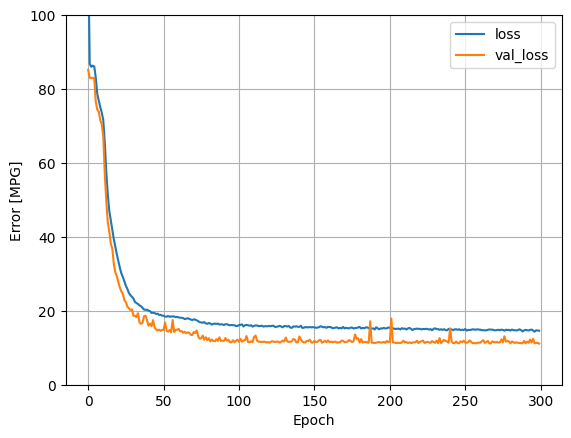

In [37]:
plot_loss(history)

In [38]:
predictions = model_lstm.predict(test_X)
evaluator(test_y,predictions) 

230/230 [==============================] - 6s 9ms/step
MSE: 11.789131369382908
RMSE: 3.4335304526657264
MAE: 1.2844645549305498
R-squared: 0.8562501668930054


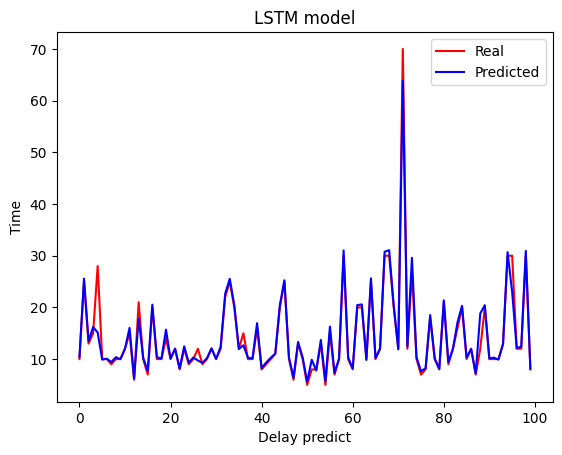

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [39]:
plot_predict(test_y.tolist()[:100], predictions[:100], "LSTM model")

In [40]:
model_lstm.save("../model/bus_lstm.h5")

### biLSTM

In [25]:
model_bilstm = init_bilstm()

history =model_bilstm.fit(train_X, train_y, epochs=300, batch_size=32,
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )


Epoch 1/300
1073/1073 [==============================] - 23s 19ms/step - loss: 109.3690 - val_loss: 82.4393
Epoch 2/300
1073/1073 [==============================] - 19s 18ms/step - loss: 83.8977 - val_loss: 79.1811
Epoch 3/300
1073/1073 [==============================] - 18s 16ms/step - loss: 79.5064 - val_loss: 75.1743
Epoch 4/300
1073/1073 [==============================] - 18s 17ms/step - loss: 77.2895 - val_loss: 75.4470
Epoch 5/300
1073/1073 [==============================] - 18s 17ms/step - loss: 74.7887 - val_loss: 70.1862
Epoch 6/300
1073/1073 [==============================] - 18s 17ms/step - loss: 72.0849 - val_loss: 68.8053
Epoch 7/300
1073/1073 [==============================] - 18s 17ms/step - loss: 70.5236 - val_loss: 67.2178
Epoch 8/300
1073/1073 [==============================] - 18s 17ms/step - loss: 69.1269 - val_loss: 65.9637
Epoch 9/300
1073/1073 [==============================] - 18s 17ms/step - loss: 67.9534 - val_loss: 64.6802
Epoch 10/300
1073/1073 [============

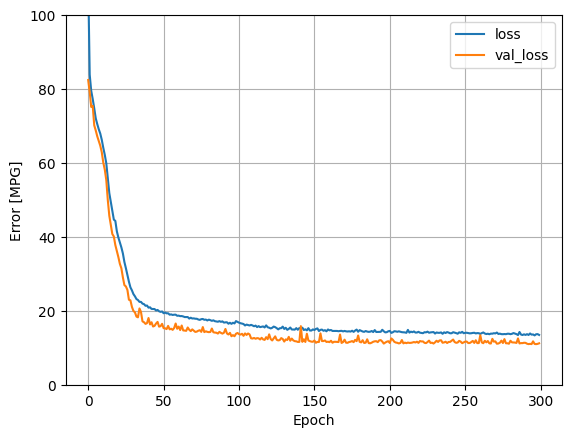

In [26]:
plot_loss(history)

In [28]:
# model_pre = init_bilstm()
# model_pre.load_weights("../model/bus_bilstm.h5")

# predictions = model_pre.predict(test_X)
# evaluator(test_y,predictions) 

230/230 [==============================] - 3s 7ms/step
MSE: 11.395186633225313
RMSE: 3.3756757298688087
MAE: 1.5708719131317304
R-squared: 0.8610537052154541


In [27]:
predictions = model_bilstm.predict(test_X)
evaluator(test_y,predictions) 


230/230 [==============================] - 4s 7ms/step
MSE: 11.395186633225313
RMSE: 3.3756757298688087
MAE: 1.5708719131317304
R-squared: 0.8610537052154541


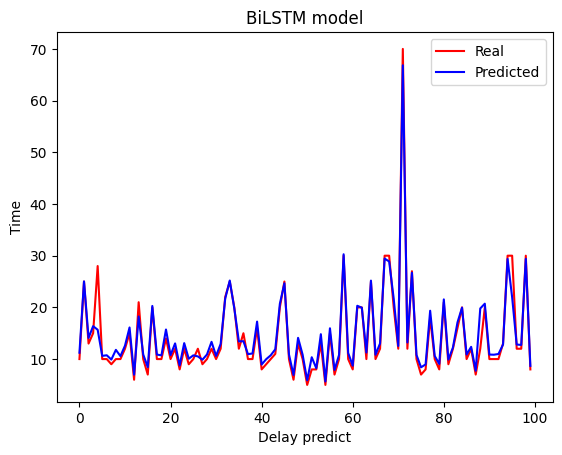

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [28]:
plot_predict(test_y.tolist()[:100], predictions[:100], "BiLSTM model")

In [29]:
model_bilstm.save("../model/bus_bilstm.h5")

### MLP

In [29]:
model_mlp = init_mlp()

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_mlp.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/300
1073/1073 [==============================] - 12s 10ms/step - loss: 155.1750 - val_loss: 84.0899
Epoch 2/300
1073/1073 [==============================] - 11s 10ms/step - loss: 95.6024 - val_loss: 83.3838
Epoch 3/300
1073/1073 [==============================] - 10s 10ms/step - loss: 94.7417 - val_loss: 83.5965
Epoch 4/300
1073/1073 [==============================] - 11s 10ms/step - loss: 94.2270 - val_loss: 83.0205
Epoch 5/300
1073/1073 [==============================] - 10s 9ms/step - loss: 93.6496 - val_loss: 83.0114
Epoch 6/300
1073/1073 [==============================] - 11s 10ms/step - loss: 93.3712 - val_loss: 83.1516
Epoch 7/300
1073/1073 [==============================] - 10s 9ms/step - loss: 92.9708 - val_loss: 83.2684
Epoch 8/300
1073/1073 [==============================] - 10s 10ms/step - loss: 92.7264 - val_loss: 83.2595
Epoch 9/300
1073/1073 [==============================] - 10s 9ms/step - loss: 92.7255 - val_loss: 83.4373
Epoch 10/300
1073/1073 [===============

KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
predictions = model_mlp.predict(test_X)
evaluator(test_y,predictions) 

In [ ]:
plot_predict(test_y.tolist()[:100], predictions[:100], "MLP model")

In [ ]:
model_mlp.save("../model/bus_mlp.h5")

### GRU

In [71]:
model_gru = init_gru()

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_gru.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/300
1073/1073 [==============================] - 12s 10ms/step - loss: 113.9183 - val_loss: 83.2533
Epoch 2/300
1073/1073 [==============================] - 10s 9ms/step - loss: 85.9634 - val_loss: 83.0024
Epoch 3/300
1073/1073 [==============================] - 9s 9ms/step - loss: 85.7520 - val_loss: 82.6809
Epoch 4/300
1073/1073 [==============================] - 9s 9ms/step - loss: 83.1511 - val_loss: 79.3495
Epoch 5/300
1073/1073 [==============================] - 9s 9ms/step - loss: 80.5237 - val_loss: 78.1452
Epoch 6/300
1073/1073 [==============================] - 10s 9ms/step - loss: 78.7319 - val_loss: 75.0150
Epoch 7/300
1073/1073 [==============================] - 9s 9ms/step - loss: 77.3547 - val_loss: 73.3745
Epoch 8/300
1073/1073 [==============================] - 10s 9ms/step - loss: 75.6747 - val_loss: 72.6950
Epoch 9/300
1073/1073 [==============================] - 10s 9ms/step - loss: 74.6452 - val_loss: 71.7181
Epoch 10/300
1073/1073 [========================

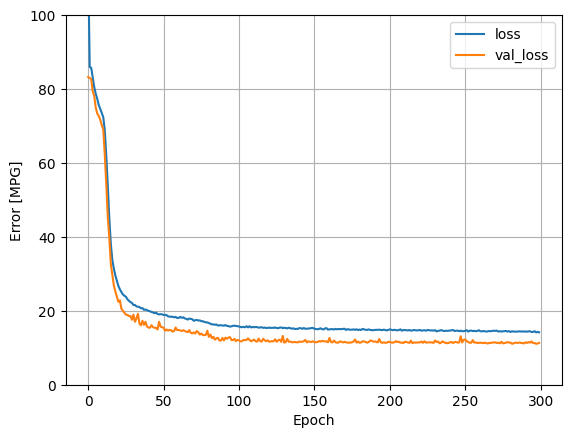

In [72]:
plot_loss(history)

In [73]:
predictions = model_gru.predict(test_X)
evaluator(test_y,predictions) 

230/230 [==============================] - 3s 5ms/step
MSE: 11.754959936003106
RMSE: 3.4285507048902026
MAE: 1.2598296208172979
R-squared: 0.8566668033599854


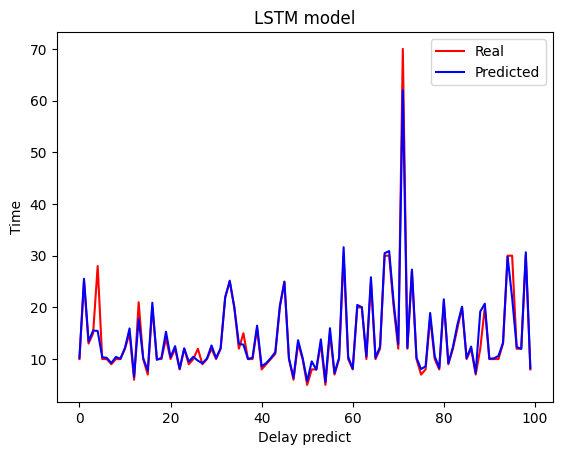

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [74]:
plot_predict(test_y.tolist()[:100], predictions[:100], "LSTM model")

In [75]:
model_gru.save("../model/bus_gru.h5")

### Bigrulstmcnn

In [30]:
model_bigrulstmcnn = create_lstm_model()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.0001)
history = model_bigrulstmcnn.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
          callbacks=[early_stopping]
          )

Epoch 1/300
1073/1073 [==============================] - 34s 27ms/step - loss: 121.6255 - val_loss: 82.6062
Epoch 2/300
1073/1073 [==============================] - 27s 25ms/step - loss: 86.5615 - val_loss: 79.6564
Epoch 3/300
1073/1073 [==============================] - 28s 26ms/step - loss: 83.8844 - val_loss: 78.1767
Epoch 4/300
1073/1073 [==============================] - 30s 28ms/step - loss: 82.3325 - val_loss: 77.3656
Epoch 5/300
1073/1073 [==============================] - 29s 27ms/step - loss: 81.2348 - val_loss: 76.2188
Epoch 6/300
1073/1073 [==============================] - 28s 27ms/step - loss: 80.1224 - val_loss: 75.2171
Epoch 7/300
1073/1073 [==============================] - 26s 24ms/step - loss: 79.0046 - val_loss: 75.1765
Epoch 8/300
1073/1073 [==============================] - 25s 24ms/step - loss: 77.7829 - val_loss: 72.9462
Epoch 9/300
1073/1073 [==============================] - 24s 23ms/step - loss: 76.3774 - val_loss: 71.7273
Epoch 10/300
1073/1073 [============

In [1]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.0001)
history = model_bigrulstmcnn.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
          callbacks=[early_stopping]
          )

NameError: name 'EarlyStopping' is not defined

In [24]:
model_pre = create_lstm_model()
model_pre.load_weights("../model/bus_bigrulstmcnn.h5")

predictions = model_pre.predict(test_X)
evaluator(test_y,predictions) 

2024-07-02 22:30:55.423386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204


 15/230 [>.............................] - ETA: 2s

2024-07-02 22:31:03.720665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


230/230 [==============================] - 13s 9ms/step
MSE: 11.453914808423212
RMSE: 3.384363279617484
MAE: 1.2711697467224337
R-squared: 0.8603376150131226


In [27]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.0001)

history = model_pre.fit(train_X, train_y, epochs=50, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
          callbacks=[early_stopping]
          )

Epoch 1/50
1073/1073 [==============================] - 26s 25ms/step - loss: 12.6923 - val_loss: 10.8482
Epoch 2/50
1073/1073 [==============================] - 23s 21ms/step - loss: 12.4644 - val_loss: 10.2427
Epoch 3/50
1073/1073 [==============================] - 23s 22ms/step - loss: 12.3732 - val_loss: 10.1907
Epoch 4/50
1073/1073 [==============================] - 23s 22ms/step - loss: 12.7157 - val_loss: 10.3949
Epoch 5/50
1073/1073 [==============================] - 23s 21ms/step - loss: 12.4019 - val_loss: 10.7571
Epoch 6/50
1073/1073 [==============================] - 23s 21ms/step - loss: 12.4963 - val_loss: 10.4739
Epoch 7/50
1073/1073 [==============================] - 23s 22ms/step - loss: 12.4322 - val_loss: 10.3045
Epoch 8/50
1073/1073 [==============================] - 24s 22ms/step - loss: 12.5708 - val_loss: 10.4252
Epoch 9/50
1073/1073 [==============================] - 23s 22ms/step - loss: 12.3244 - val_loss: 10.4058
Epoch 10/50
1073/1073 [=======================

In [28]:
predictions = model_pre.predict(test_X)
evaluator(test_y,predictions) 

230/230 [==============================] - 2s 8ms/step
MSE: 11.265606286658397
RMSE: 3.3564276078381905
MAE: 1.2024521472564889
R-squared: 0.8626337051391602


In [31]:
predictions = model_bigrulstmcnn.predict(test_X)
evaluator(test_y,predictions) 

230/230 [==============================] - 3s 8ms/step
MSE: 13.68891899488092
RMSE: 3.6998539153432692
MAE: 1.5423629012370959
R-squared: 0.8330852389335632


In [ ]:
# MSE: 11.453914808423212
# RMSE: 3.384363279617484
# MAE: 1.2711697467224337
# R-squared: 0.8603376150131226

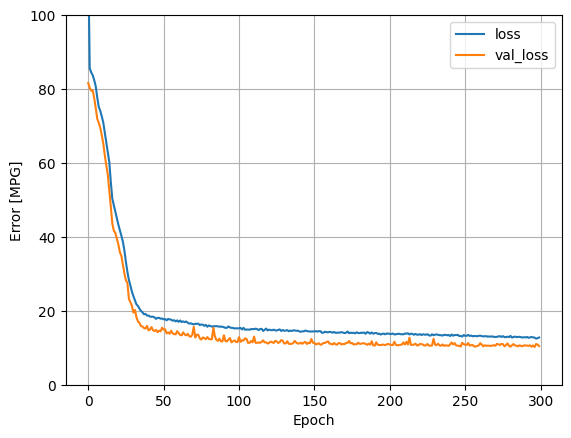

In [28]:
plot_loss(history)

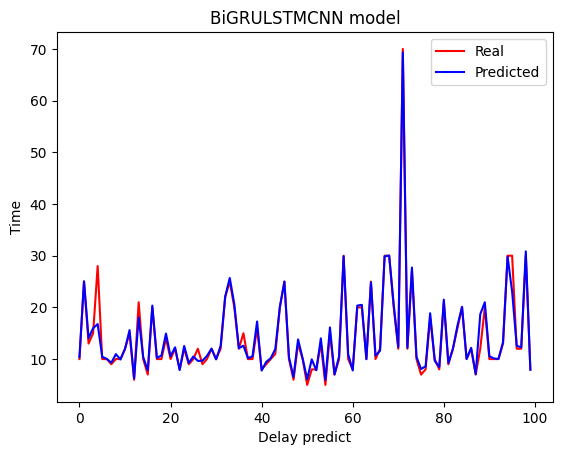

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [29]:
plot_predict(test_y.tolist()[:100], predictions[:100], "BiGRULSTMCNN model")

In [30]:
model_bigrulstmcnn.save("../model/bus_bigrulstmcnn.h5")

# 4. Subway

## 4.1 Load data

In [17]:
subway = pd.read_csv("../data/features_data/subway_feature_pd.csv")
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7382 entries, 0 to 7381
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             7382 non-null   object
 1   time             7382 non-null   object
 2   day              7382 non-null   object
 3   station          7382 non-null   object
 4   code             7382 non-null   object
 5   min_delay        7382 non-null   int64 
 6   min_gap          7382 non-null   int64 
 7   bound            7382 non-null   object
 8   line             7382 non-null   object
 9   vehicle          7382 non-null   int64 
 10  day_month        7382 non-null   int64 
 11  month            7382 non-null   int64 
 12  hour             7382 non-null   int64 
 13  min              7382 non-null   int64 
 14  at_station       7382 non-null   int64 
 15  day_indexed      7382 non-null   int64 
 16  code_indexed     7382 non-null   int64 
 17  bound_indexed    7382 non-null   

In [18]:
X =np.array(subway['scaled'].apply(ast.literal_eval).tolist())

In [19]:
y = subway["min_delay"]

In [20]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.3, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)


In [21]:
train_X.shape[1]

15

## 4.2 Train

### CNN

In [21]:
model_cnn = init_cnn()

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_cnn.fit(train_X, train_y, epochs=500, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

2024-07-02 17:38:19.756018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 17:38:19.876039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 17:38:19.876116: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 17:38:19.877953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

Epoch 1/500


2024-07-02 17:38:27.065601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2024-07-02 17:38:40.359276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


162/162 [==============================] - 21s 14ms/step - loss: 60.4308 - val_loss: 29.9732
Epoch 2/500
162/162 [==============================] - 2s 10ms/step - loss: 32.5780 - val_loss: 29.2098
Epoch 3/500
162/162 [==============================] - 2s 10ms/step - loss: 31.5489 - val_loss: 28.1697
Epoch 4/500
162/162 [==============================] - 2s 10ms/step - loss: 30.0711 - val_loss: 26.3403
Epoch 5/500
162/162 [==============================] - 2s 11ms/step - loss: 27.5146 - val_loss: 22.9343
Epoch 6/500
162/162 [==============================] - 2s 10ms/step - loss: 22.4363 - val_loss: 17.0253
Epoch 7/500
162/162 [==============================] - 2s 10ms/step - loss: 15.7849 - val_loss: 10.2321
Epoch 8/500
162/162 [==============================] - 2s 11ms/step - loss: 9.2919 - val_loss: 6.0003
Epoch 9/500
162/162 [==============================] - 2s 12ms/step - loss: 6.7210 - val_loss: 4.6847
Epoch 10/500
162/162 [==============================] - 2s 12ms/step - loss: 5.

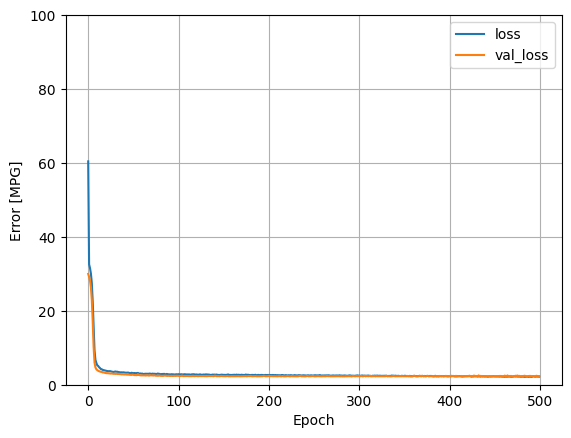

In [22]:
plot_loss(history)

In [23]:
predictions = model_cnn.predict(test_X)
evaluator(test_y,predictions) 


35/35 [==============================] - 1s 14ms/step
MSE: 3.6284478478706754
RMSE: 1.9048485104781103
MAE: 0.8798914513002665
R-squared: 0.8818873167037964


In [ ]:
plot_predict(test_y.tolist()[:100], predictions[:100], "CNN model")

In [36]:
model_cnn.save("../model/subway_cnn_300.h5")

### LSTM

In [59]:
model = init_lstm()

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/300
162/162 [==============================] - 10s 23ms/step - loss: 61.7559 - val_loss: 30.9023
Epoch 2/300
162/162 [==============================] - 3s 15ms/step - loss: 33.7479 - val_loss: 30.6384
Epoch 3/300
162/162 [==============================] - 2s 15ms/step - loss: 33.6062 - val_loss: 30.4046
Epoch 4/300
162/162 [==============================] - 3s 16ms/step - loss: 33.3256 - val_loss: 30.0857
Epoch 5/300
162/162 [==============================] - 3s 16ms/step - loss: 33.1380 - val_loss: 30.0078
Epoch 6/300
162/162 [==============================] - 3s 16ms/step - loss: 32.8405 - val_loss: 29.4883
Epoch 7/300
162/162 [==============================] - 3s 16ms/step - loss: 32.5388 - val_loss: 29.5170
Epoch 8/300
162/162 [==============================] - 3s 16ms/step - loss: 32.5937 - val_loss: 29.4633
Epoch 9/300
162/162 [==============================] - 2s 15ms/step - loss: 32.5759 - val_loss: 29.3406
Epoch 10/300
162/162 [==============================] - 3s 16ms

In [26]:
model = init_lstm()
model.load_weights("../model/subway_lstm_600.h5")

predictions = model.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 1s 10ms/step
MSE: 3.616951929717886
RMSE: 1.9018285752711483
MAE: 1.042774486842999
R-squared: 0.8822615742683411


In [27]:
history = model.fit(train_X, train_y, epochs=100, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/100
162/162 [==============================] - 6s 18ms/step - loss: 3.1067 - val_loss: 2.5688
Epoch 2/100
162/162 [==============================] - 2s 14ms/step - loss: 3.0906 - val_loss: 2.6143
Epoch 3/100
162/162 [==============================] - 2s 14ms/step - loss: 3.1229 - val_loss: 2.5691
Epoch 4/100
162/162 [==============================] - 2s 14ms/step - loss: 3.2762 - val_loss: 2.5584
Epoch 5/100
162/162 [==============================] - 2s 14ms/step - loss: 3.2171 - val_loss: 2.5520
Epoch 6/100
162/162 [==============================] - 2s 14ms/step - loss: 3.1457 - val_loss: 2.6484
Epoch 7/100
162/162 [==============================] - 2s 14ms/step - loss: 3.0831 - val_loss: 2.7037
Epoch 8/100
162/162 [==============================] - 2s 14ms/step - loss: 3.1380 - val_loss: 2.5582
Epoch 9/100
162/162 [==============================] - 2s 14ms/step - loss: 3.1842 - val_loss: 2.5849
Epoch 10/100
162/162 [==============================] - 2s 15ms/step - loss: 3.255

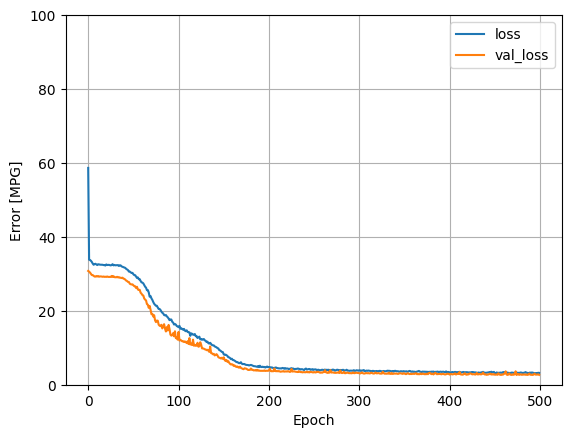

In [ ]:
plot_loss(history)

In [28]:
predictions = model.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 0s 10ms/step
MSE: 3.8263844698119316
RMSE: 1.9561146361632111
MAE: 1.0301895909791388
R-squared: 0.8754441738128662


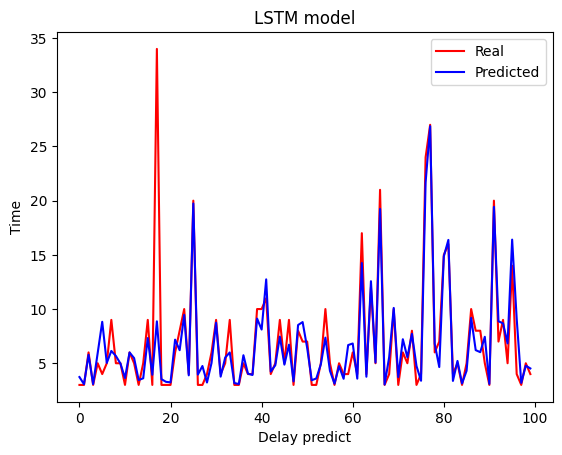

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_predict(test_y.tolist()[:100], predictions[:100], "LSTM model")

In [71]:
model.save("../model/subway_lstm_600.h5")

### BiLSTM

In [41]:
model_bilstm = init_bilstm()

history =model_bilstm.fit(train_X, train_y, epochs=300, batch_size=32,
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )


Epoch 1/300
162/162 [==============================] - 7s 24ms/step - loss: 59.8503 - val_loss: 30.4804
Epoch 2/300
162/162 [==============================] - 3s 18ms/step - loss: 33.3826 - val_loss: 30.4314
Epoch 3/300
162/162 [==============================] - 3s 18ms/step - loss: 33.3494 - val_loss: 30.2062
Epoch 4/300
162/162 [==============================] - 3s 18ms/step - loss: 33.1656 - val_loss: 30.3215
Epoch 5/300
162/162 [==============================] - 3s 17ms/step - loss: 32.7947 - val_loss: 29.7874
Epoch 6/300
162/162 [==============================] - 3s 17ms/step - loss: 32.6775 - val_loss: 29.6985
Epoch 7/300
162/162 [==============================] - 3s 17ms/step - loss: 32.6473 - val_loss: 29.6526
Epoch 8/300
162/162 [==============================] - 3s 18ms/step - loss: 32.4194 - val_loss: 29.5186
Epoch 9/300
162/162 [==============================] - 3s 17ms/step - loss: 32.4057 - val_loss: 29.4844
Epoch 10/300
162/162 [==============================] - 3s 17ms/

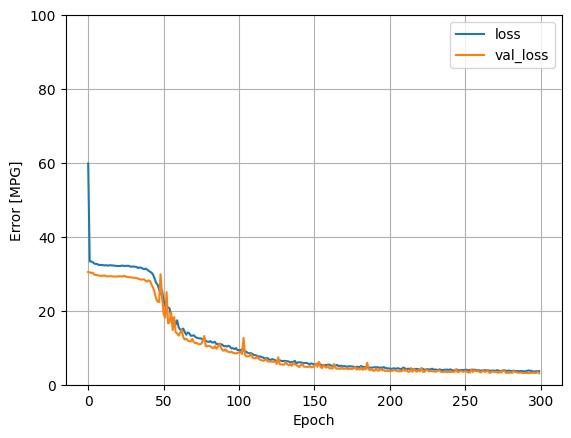

In [42]:
plot_loss(history)

In [67]:
history =model_bilstm.fit(train_X, train_y, epochs=100, batch_size=32,
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/100
162/162 [==============================] - 3s 19ms/step - loss: 2.6698 - val_loss: 2.8294
Epoch 2/100
162/162 [==============================] - 3s 19ms/step - loss: 2.7688 - val_loss: 2.6699
Epoch 3/100
162/162 [==============================] - 3s 18ms/step - loss: 2.7447 - val_loss: 2.6838
Epoch 4/100
162/162 [==============================] - 3s 18ms/step - loss: 2.7300 - val_loss: 2.6728
Epoch 5/100
162/162 [==============================] - 3s 18ms/step - loss: 2.8309 - val_loss: 2.7934
Epoch 6/100
162/162 [==============================] - 3s 18ms/step - loss: 2.7721 - val_loss: 2.6247
Epoch 7/100
162/162 [==============================] - 3s 18ms/step - loss: 2.7702 - val_loss: 2.6388
Epoch 8/100
162/162 [==============================] - 3s 18ms/step - loss: 2.6947 - val_loss: 2.5676
Epoch 9/100
162/162 [==============================] - 3s 18ms/step - loss: 2.7049 - val_loss: 2.6541
Epoch 10/100
162/162 [==============================] - 3s 17ms/step - loss: 2.795

In [68]:
predictions = model_bilstm.predict(test_X)
evaluator(test_y,predictions) 


35/35 [==============================] - 0s 7ms/step
MSE: 3.9541525046900556
RMSE: 1.9885050929504948
MAE: 1.0676845045296293
R-squared: 0.871285080909729


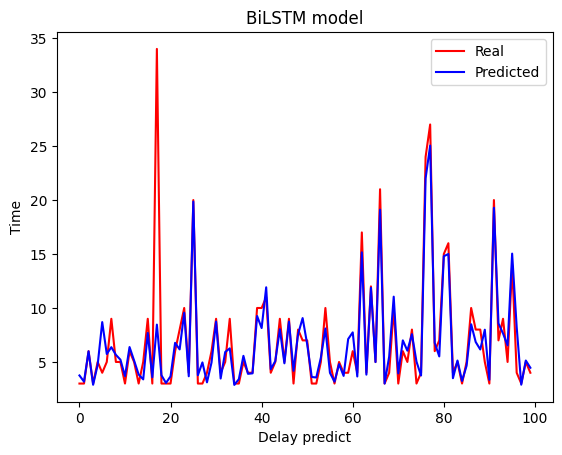

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [63]:
plot_predict(test_y.tolist()[:100], predictions[:100], "BiLSTM model")

In [66]:
model_bilstm.save("../model/subway_bilstm_800.h5")

### MLP

In [45]:
model_mlp = init_mlp()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_mlp.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/300
162/162 [==============================] - 3s 12ms/step - loss: 79.0910 - val_loss: 65.2506
Epoch 2/300
162/162 [==============================] - 2s 10ms/step - loss: 53.0559 - val_loss: 37.5701
Epoch 3/300
162/162 [==============================] - 2s 10ms/step - loss: 41.9675 - val_loss: 35.0665
Epoch 4/300
162/162 [==============================] - 2s 10ms/step - loss: 40.1822 - val_loss: 33.4489
Epoch 5/300
162/162 [==============================] - 2s 10ms/step - loss: 38.6504 - val_loss: 32.3730
Epoch 6/300
162/162 [==============================] - 2s 10ms/step - loss: 37.7091 - val_loss: 31.5554
Epoch 7/300
162/162 [==============================] - 2s 10ms/step - loss: 37.0326 - val_loss: 31.1336
Epoch 8/300
162/162 [==============================] - 2s 10ms/step - loss: 36.8268 - val_loss: 31.1958
Epoch 9/300
162/162 [==============================] - 2s 10ms/step - loss: 36.7385 - val_loss: 30.9554
Epoch 10/300
162/162 [==============================] - 1s 9ms/s

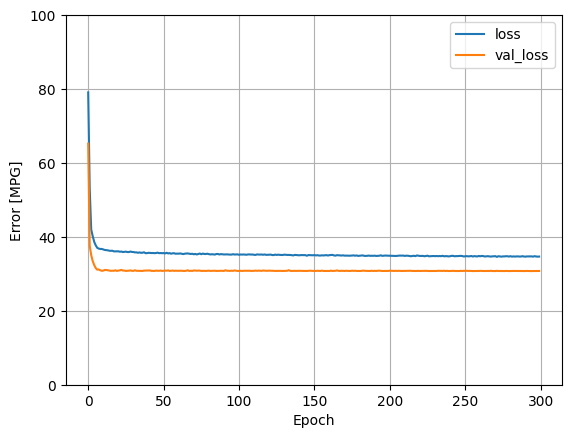

In [47]:
plot_loss(history)

In [48]:
predictions = model_mlp.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 0s 11ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
plot_predict(test_y.tolist()[:100], predictions[:100], "MLP model")

In [ ]:
model_mlp.save("../model/subway_mlp.h5")

### GRU

In [69]:
model_gru = init_gru()

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True,min_delta=0.001)
history = model_gru.fit(train_X, train_y, epochs=500, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/500
162/162 [==============================] - 6s 14ms/step - loss: 69.3419 - val_loss: 31.2607
Epoch 2/500
162/162 [==============================] - 2s 10ms/step - loss: 33.6893 - val_loss: 30.4876
Epoch 3/500
162/162 [==============================] - 2s 9ms/step - loss: 33.6543 - val_loss: 30.4550
Epoch 4/500
162/162 [==============================] - 2s 10ms/step - loss: 33.3717 - val_loss: 30.4733
Epoch 5/500
162/162 [==============================] - 2s 10ms/step - loss: 33.3727 - val_loss: 30.3336
Epoch 6/500
162/162 [==============================] - 2s 10ms/step - loss: 33.2771 - val_loss: 30.3374
Epoch 7/500
162/162 [==============================] - 2s 10ms/step - loss: 33.3497 - val_loss: 30.2949
Epoch 8/500
162/162 [==============================] - 2s 10ms/step - loss: 33.1437 - val_loss: 30.1548
Epoch 9/500
162/162 [==============================] - 2s 10ms/step - loss: 33.1845 - val_loss: 30.0521
Epoch 10/500
162/162 [==============================] - 2s 10ms/s

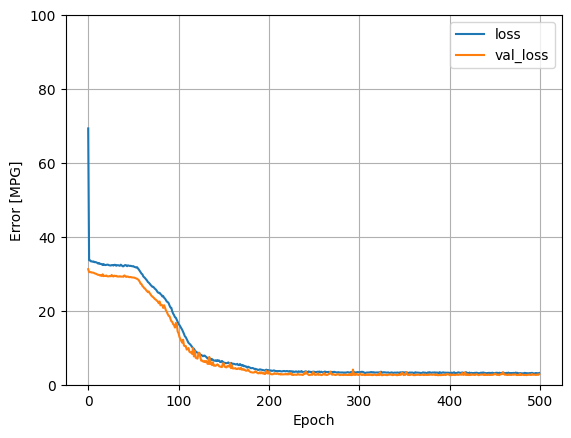

In [70]:
plot_loss(history)

In [93]:
history = model_gru.fit(train_X, train_y, epochs=100, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/100
162/162 [==============================] - 2s 10ms/step - loss: 2.8658 - val_loss: 2.6517
Epoch 2/100
162/162 [==============================] - 2s 10ms/step - loss: 2.8717 - val_loss: 2.7030
Epoch 3/100
162/162 [==============================] - 2s 10ms/step - loss: 2.7839 - val_loss: 2.6853
Epoch 4/100
162/162 [==============================] - 2s 10ms/step - loss: 2.7931 - val_loss: 2.6642
Epoch 5/100
162/162 [==============================] - 2s 10ms/step - loss: 2.7701 - val_loss: 2.6731
Epoch 6/100
162/162 [==============================] - 2s 10ms/step - loss: 2.7923 - val_loss: 2.7393
Epoch 7/100
162/162 [==============================] - 2s 10ms/step - loss: 2.8493 - val_loss: 2.7178
Epoch 8/100
162/162 [==============================] - 2s 10ms/step - loss: 2.8067 - val_loss: 2.6456
Epoch 9/100
162/162 [==============================] - 2s 9ms/step - loss: 2.7649 - val_loss: 2.8229
Epoch 10/100
162/162 [==============================] - 2s 10ms/step - loss: 2.8165

In [94]:
predictions = model_gru.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 0s 4ms/step
MSE: 3.3996254145394382
RMSE: 1.843807314916458
MAE: 1.0316821566987984
R-squared: 0.8893359303474426


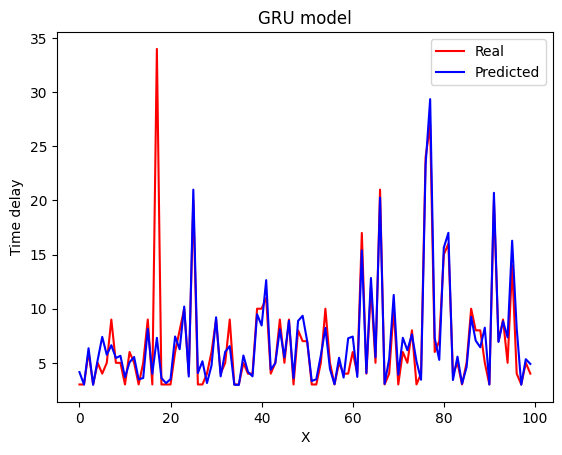

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [73]:
plot_predict(test_y.tolist()[:100], predictions[:100], "GRU model")

In [88]:
model_gru.save("../model/subway_gru_1000.h5")

### Bigrulstmcnn

In [22]:
model_bigrulstmcnn = create_lstm_model()

history = model_bigrulstmcnn.fit(train_X, train_y, epochs=300, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

2024-07-01 22:14:49.569085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 22:14:49.635829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 22:14:49.635878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-01 22:14:49.637143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

Epoch 1/300


2024-07-01 22:14:57.499428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2024-07-01 22:15:02.847169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


162/162 [==============================] - 17s 28ms/step - loss: 73.1468 - val_loss: 33.6321
Epoch 2/300
162/162 [==============================] - 3s 21ms/step - loss: 34.4973 - val_loss: 30.1157
Epoch 3/300
162/162 [==============================] - 4s 22ms/step - loss: 33.9883 - val_loss: 30.0167
Epoch 4/300
162/162 [==============================] - 3s 20ms/step - loss: 33.8806 - val_loss: 29.9182
Epoch 5/300
162/162 [==============================] - 3s 21ms/step - loss: 33.7754 - val_loss: 29.8545
Epoch 6/300
162/162 [==============================] - 3s 20ms/step - loss: 33.6832 - val_loss: 29.7884
Epoch 7/300
162/162 [==============================] - 3s 19ms/step - loss: 33.4384 - val_loss: 29.7824
Epoch 8/300
162/162 [==============================] - 3s 20ms/step - loss: 33.4405 - val_loss: 29.4858
Epoch 9/300
162/162 [==============================] - 3s 20ms/step - loss: 32.9100 - val_loss: 29.5190
Epoch 10/300
162/162 [==============================] - 3s 20ms/step - loss

In [23]:
predictions = model_bigrulstmcnn.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 1s 9ms/step
MSE: 3.5399917576174165
RMSE: 1.8814865818329443
MAE: 0.9799096033461258
R-squared: 0.8847667574882507


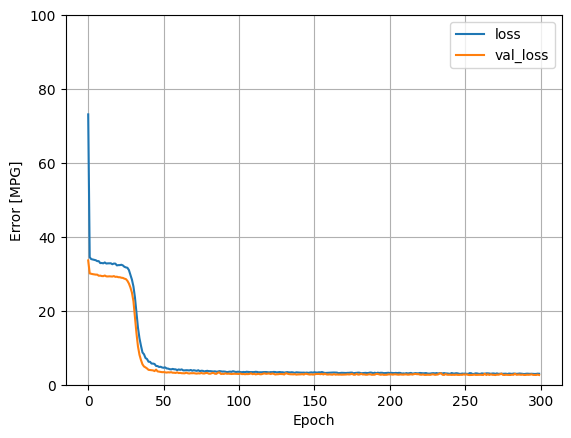

In [24]:
plot_loss(history)

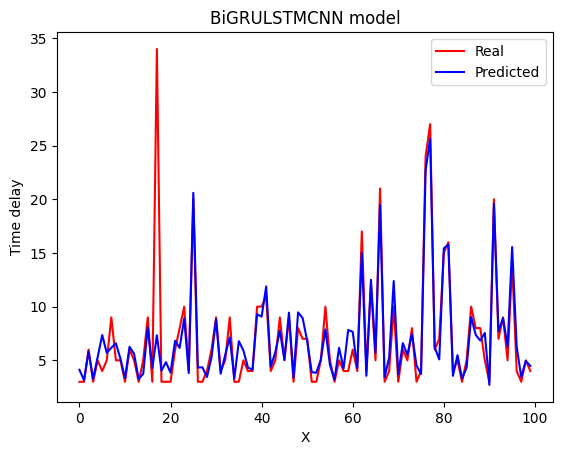

<module 'matplotlib.pyplot' from '/home/phannhaan/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [25]:
plot_predict(test_y.tolist()[:100], predictions[:100], "BiGRULSTMCNN model")

In [27]:
model_bigrulstmcnn.save("../model/subway_bigrulstmcnn_300.h5")

In [43]:
history = model_bigrulstmcnn.fit(train_X, train_y, epochs=100, batch_size=32, 
          validation_data=(val_X, val_y), verbose=True,
        #   callbacks=[early_stopping]
          )

Epoch 1/100
162/162 [==============================] - 4s 23ms/step - loss: 2.2156 - val_loss: 2.5575
Epoch 2/100
162/162 [==============================] - 4s 22ms/step - loss: 2.3029 - val_loss: 2.5809
Epoch 3/100
162/162 [==============================] - 4s 22ms/step - loss: 2.2558 - val_loss: 2.5451
Epoch 4/100
162/162 [==============================] - 3s 21ms/step - loss: 2.3368 - val_loss: 2.5472
Epoch 5/100
162/162 [==============================] - 3s 21ms/step - loss: 2.2606 - val_loss: 2.5915
Epoch 6/100
162/162 [==============================] - 3s 20ms/step - loss: 2.1235 - val_loss: 2.5980
Epoch 7/100
162/162 [==============================] - 3s 21ms/step - loss: 2.2458 - val_loss: 2.7429
Epoch 8/100
162/162 [==============================] - 3s 20ms/step - loss: 2.2549 - val_loss: 2.5926
Epoch 9/100
162/162 [==============================] - 3s 21ms/step - loss: 2.2299 - val_loss: 2.6065
Epoch 10/100
162/162 [==============================] - 3s 20ms/step - loss: 2.194

In [44]:
predictions = model_bigrulstmcnn.predict(test_X)
evaluator(test_y,predictions) 

35/35 [==============================] - 0s 8ms/step
MSE: 3.3552694510051992
RMSE: 1.8317394604597017
MAE: 0.9268786855553032
R-squared: 0.8907797932624817


In [42]:
model_bigrulstmcnn.save("../model/subway_bigrulstmcnn_800.h5")